In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

import itertools
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import uniform as sp_rand
from scipy.stats import randint as sp_randint

%matplotlib inline

In [2]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

### Load Dataset

In [3]:
train = pd.read_csv('data/train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
resumetable(train)

Dataset Shape: (42000, 785)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,label,int64,0,10,1,0,1,3.32
1,pixel0,int64,0,1,0,0,0,0.00
2,pixel1,int64,0,1,0,0,0,0.00
3,pixel2,int64,0,1,0,0,0,0.00
4,pixel3,int64,0,1,0,0,0,0.00
...,...,...,...,...,...,...,...,...
780,pixel779,int64,0,3,0,0,0,0.00
781,pixel780,int64,0,1,0,0,0,0.00
782,pixel781,int64,0,1,0,0,0,0.00
783,pixel782,int64,0,1,0,0,0,0.00


In [5]:
train['label'].value_counts().to_dict()

{1: 4684,
 7: 4401,
 3: 4351,
 9: 4188,
 2: 4177,
 6: 4137,
 0: 4132,
 4: 4072,
 8: 4063,
 5: 3795}

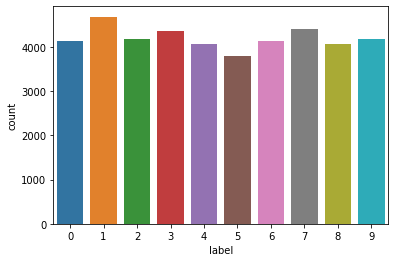

In [6]:
sns.countplot(train['label'])

In [7]:
test = pd.read_csv('data/test.csv')

In [8]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
resumetable(test)

Dataset Shape: (28000, 784)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,pixel0,int64,0,1,0,0,0,0.0
1,pixel1,int64,0,1,0,0,0,0.0
2,pixel2,int64,0,1,0,0,0,0.0
3,pixel3,int64,0,1,0,0,0,0.0
4,pixel4,int64,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...
779,pixel779,int64,0,1,0,0,0,0.0
780,pixel780,int64,0,1,0,0,0,0.0
781,pixel781,int64,0,1,0,0,0,0.0
782,pixel782,int64,0,1,0,0,0,0.0


- DataFrame索引.ix/.iloc/.loc的使用以及区别
    - .loc[] 中括号里边是先行后列，以逗号分割，行和列分别是行标签和列标签，<code>data.loc['b', 'B']</code> 选择某值，<code>data.loc['b':'c', 'B':'C']</code>选择某个区间，没有闭开之分。
    - .iloc[] 中括号里是先行后列，以逗号分割，行和列分别是行标签和列标签，<code>data.iloc[1,3]</code> 索引从0开始，选择某值 <code>data.iloc[1:3, 1:3]</code> 区间是前闭后开。
    - ~~.ix[] 可以使用.loc[]和.iloc[]上面的两种方法。~~

In [10]:
# 类型转换
x_train = (train.iloc[:,1:].values).astype('float32')
y_train = (train.iloc[:,0].values).astype('int32')  # astype可以被调用的是一个array
x_test = test.values.astype('float32')

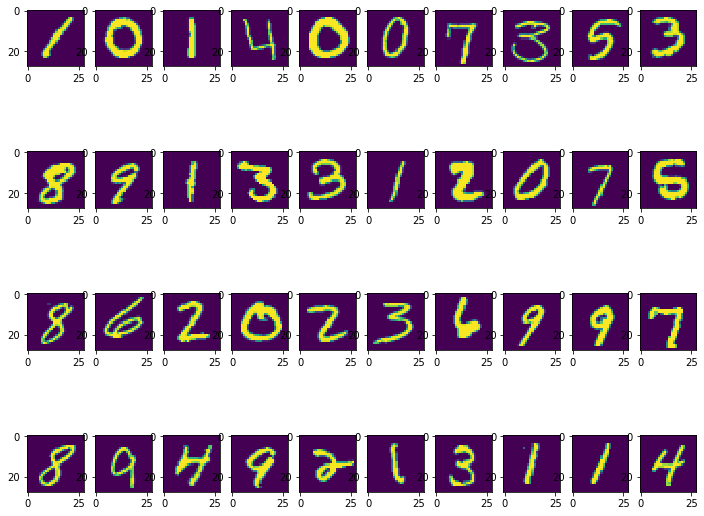

In [11]:
## 数据可视化
plt.figure(figsize=(12, 10)) # 画布大小
x, y = 10, 4 # 设置row和col数量
for i in range(40):
    plt.subplot(y, x, i + 1)  # 行数，列数，标号：从左至右，从上到下，从1开始标号
    plt.imshow(x_train[i].reshape((28, 28)), interpolation='nearest')
plt.show()

### Normalising Data

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Dimensionality Reduction
- Variance Filter
  max_depth=m sklearn.feature_selection import VarianceThreshold
- Correlation filter
    - from sklearn.feature_selection import SelectKBest 
    - from sklearn.feature_selection import f_regression
- Random Forest
    - from sklearn.ensemble import RandomForestRegressor
- Backward Feature Elimination
    - from sklearn.linear_model import LinearRegression
- Forward Feature Selection
    - from sklearn.feature_selection import f_regression
- Factor Analysis
    - from sklearn.decomposition import FactorAnalysis
- PCA
    - from sklearn.decomposition import PCA
- ICA
    - from sklearn.decomposition import FastICA 
- IOSMAP 
    - from sklearn import manifold
- t-SNE
    - from sklearn.manifold import TSNE 
- UMAP
    - import umap
    
**Data reduction after dimensionality reduction**

### Split Dataset

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(feature_random_forest_fin, y_train, test_size=0.75, random_state=2020)

In [97]:
X_test.shape, X_train.shape, Y_test.shape, Y_train.shape

((31500, 224), (10500, 224), (31500,), (10500,))

### Random Forest
随机森林可以看成是一种广泛使用的特征选择算法，它会计算各个特征的重要性，有助于选择较小的特征子集。随机森林算法只接受数字输入，在mnist数据集上符合这个要求。

In [62]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(random_state=1, max_depth=10)

In [63]:
model_random_forest.fit(train.iloc[:,1:], train.label)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

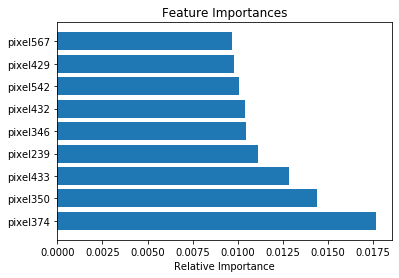

In [65]:
# Top 10 feature show
plt.figure()
features = train.iloc[:,1:].columns
importances = model.feature_importances_
indices = np.argsort(-importances)[0:9]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [93]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model_random_forest)
feature_random_forest_fin = feature.fit_transform(x_train, y_train)
# feature_random_forest_fin_test = feature.fit_transform(X_test, Y_test)

In [90]:
feature_random_forest_fin_train.shape

(10500, 219)

In [91]:
feature_random_forest_fin_test.shape

(31500, 210)

In [92]:
feature

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=10,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=1, verbose=0,
                                                 warm_sta

   accuracy                           0.55     31500
   
   macro avg       0.47      0.54      0.49     31500
   
weighted avg       0.48      0.55      0.50     31500

### Correlation Filter

In [109]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression

In [110]:
feature_f_regression_fin = SelectKBest(f_regression, 100).fit_transform(x_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(feature_f_regression_fin, y_train, test_size=0.75, random_state=2020)

In [112]:
clf.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [113]:
y_true, y_pred = Y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      3150
           1       0.61      0.86      0.71      3503
           2       0.63      0.45      0.53      3144
           3       0.65      0.40      0.50      3279
           4       0.61      0.50      0.55      3086
           5       0.33      0.28      0.30      2761
           6       0.28      0.48      0.36      3085
           7       0.54      0.80      0.65      3260
           8       0.00      0.00      0.00      3067
           9       0.48      0.64      0.55      3165

    accuracy                           0.52     31500
   macro avg       0.48      0.51      0.48     31500
weighted avg       0.49      0.52      0.49     31500



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### PCA

In [114]:
from sklearn.decomposition import PCA

In [115]:
pca = PCA(n_components=100)
feature_pca_fin = pca.fit_transform(x_train, y_train) 

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(feature_f_regression_fin, y_train, test_size=0.75, random_state=2020)

In [117]:
clf.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [121]:
y_true, y_pred = Y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3150
           1       0.55      0.85      0.67      3503
           2       0.70      0.52      0.60      3144
           3       0.42      0.74      0.54      3279
           4       0.79      0.57      0.66      3086
           5       0.00      0.00      0.00      2761
           6       0.44      0.60      0.51      3085
           7       0.51      0.79      0.62      3260
           8       0.00      0.00      0.00      3067
           9       0.54      0.56      0.55      3165

    accuracy                           0.55     31500
   macro avg       0.47      0.54      0.49     31500
weighted avg       0.48      0.55      0.50     31500



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## CART Algorithm

关于CART的实现，在scikit-learn上有一个它的实现，DecisionTreeClassifier/DecisionTreeRegressor。
- DTC和DTR重要参数调节要点

|参数 |DecisionTreeClassifier |DecisionTreeRegressor |
| :-----| ----: | :----: |
|criterion|可以使用'gini'基尼系数，也可以使用'entropy'增益，一般默认使用'gini'即CART算法，'entropy'可以表示为ID3和C4.5类似的算法|可以使用'mse'(均方差)或'mae'(均值绝对值之和)。推荐使用'mse',一般来讲'mse'比'mae'更加精确|
|splitter|可以使用'best'或者'random'，前者在特征的所有划分点中找出最优的划分点。后者是随机在部分划分点中找局部最优的划分点||
|max_features|默认是'None'，意味着划分时考虑所有的特征数；若是'log2'意味着划分时最多考虑$log_2N$个特征；若是'sqrt'或'auto'意味着划分时最多考虑$\sqrt(N)$个特征。若是整数，代表考虑的特征的绝对值。若是浮点数，考虑的是特征的百分比。 一般来讲，若特征数不多，如小于50，默认采用'None'，若特征过多，可以灵活考虑使用刚刚描述的语言||
|max_depth|决策树的最大深度，若不输入的话，决策树在建立的时候不会限制子树的深度。具体的取值取决于数据的分布，常用的取值为10-100之间||
|min_samples_split|这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2.如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。10万样本，可以考虑使用min_samples_split=10作为参考||
|min_samples_leaf|这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。10万样本，min_samples_leaf=5作为参考||
|min_weight_fraction_leaf|这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。||
|max_leaf_nodes|通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。||
|class_weight|指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，或者用“balanced”，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的"None"|不适用于回归树|
|min_impurity_split|这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点。即为叶子节点 。||
|presort|这个值是布尔值，默认是False不排序。一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为true可以让划分点选择更加快，决策树建立的更加快。如果样本量太大的话，反而没有什么好处。||

In [99]:
# set parameter for RandomizedSearch algorithm cross-validation
tuned_parameters = {"criterion": ["gini"],
              "min_samples_split": sp_randint(2, 10),
              "max_depth": sp_randint(2, 10),
              "min_samples_leaf": sp_randint(2, 10),
              "max_leaf_nodes": sp_randint(2,10),
              }

In [100]:
clf = tree.DecisionTreeClassifier()

In [101]:
n_iter_search = 100 
clf = RandomizedSearchCV(clf,
                         param_distributions=tuned_parameters,
                         n_iter=n_iter_search, 
                         cv=10)

In [102]:
clf.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [105]:
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 9, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [106]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_max_leaf_nodes', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [107]:
print(clf.cv_results_['mean_test_score'])

[0.20304762 0.4567619  0.20304762 0.20304762 0.20304762 0.27152381
 0.48714286 0.4567619  0.27152381 0.33895238 0.55038095 0.53333333
 0.20304762 0.39295238 0.4567619  0.33895238 0.4567619  0.4567619
 0.52485714 0.20304762 0.20304762 0.39295238 0.4567619  0.53333333
 0.27152381 0.4567619  0.33895238 0.20304762 0.52485714 0.33895238
 0.4567619  0.53333333 0.53333333 0.4567619  0.49142857 0.27152381
 0.50980952 0.4567619  0.33895238 0.20304762 0.20304762 0.55038095
 0.39295238 0.55038095 0.27152381 0.20304762 0.33895238 0.39295238
 0.49142857 0.27152381 0.20304762 0.49142857 0.27152381 0.53333333
 0.20304762 0.4567619  0.4567619  0.20304762 0.33895238 0.4567619
 0.20304762 0.48714286 0.33895238 0.27152381 0.27152381 0.39295238
 0.4567619  0.47209524 0.55038095 0.4567619  0.50980952 0.53333333
 0.20304762 0.20304762 0.4567619  0.53333333 0.33895238 0.4567619
 0.27152381 0.33895238 0.33895238 0.49142857 0.55038095 0.39295238
 0.39295238 0.4567619  0.4567619  0.33895238 0.55038095 0.4914285

In [108]:
y_true, y_pred = Y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3150
           1       0.55      0.85      0.67      3503
           2       0.70      0.52      0.60      3144
           3       0.42      0.74      0.54      3279
           4       0.79      0.57      0.66      3086
           5       0.00      0.00      0.00      2761
           6       0.44      0.60      0.51      3085
           7       0.51      0.79      0.62      3260
           8       0.00      0.00      0.00      3067
           9       0.54      0.56      0.55      3165

    accuracy                           0.55     31500
   macro avg       0.47      0.54      0.49     31500
weighted avg       0.48      0.55      0.50     31500



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
clf_fin = tree.DecisionTreeClassifier()

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.75, random_state=2020)

In [120]:
clf.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [124]:
y_true, y_pred = Y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3150
           1       0.55      0.85      0.67      3503
           2       0.70      0.52      0.60      3144
           3       0.42      0.74      0.54      3279
           4       0.79      0.57      0.66      3086
           5       0.00      0.00      0.00      2761
           6       0.44      0.60      0.51      3085
           7       0.51      0.79      0.62      3260
           8       0.00      0.00      0.00      3067
           9       0.54      0.56      0.55      3165

    accuracy                           0.55     31500
   macro avg       0.47      0.54      0.49     31500
weighted avg       0.48      0.55      0.50     31500



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [125]:
y_pred

array([1, 3, 3, ..., 4, 4, 2])

In [123]:
from sklearn.model_selection import StratifiedKFold

In [130]:
fold = StratifiedKFold(n_splits=5)

### 5 fold cross validation

In [ ]:
pred_result = []
for idx, (train_idx, test_idx) in enumerate(fold.split(x_train, y_train)):
    print(idx, 'fold:')
    clf_fin = tree.DecisionTreeClassifier()
    train_set_x = x_train[train_idx]
    train_set_y = y_train[train_idx]
    test_set_x = x_train[test_idx]
    test_set_y = y_train[test_idx]
    clf.fit(train_set_x, train_set_y)
    y_true, y_pred = test_set_y, model.predict(test_set_x)
    print(classification_report(y_true, y_pred))
    pred_result.append(model.predict(x_test))